In [1]:
# Example: Customer Segmentation for a Retail Company
# Business Context
# A retail chain wants to understand its customers better. Instead of treating everyone the same,
# they want to group customers into segments (like “budget shoppers,” “loyal premium buyers,” etc.)
#  so they can:
# - Personalize marketing campaigns
# - Recommend products more effectively
# - Improve customer retention

# Dataset (simplified)
# Imagine we have customer data with features like:
# - Annual Income (numeric)
# - Spending Score (numeric, based on purchase behavior)
# - Age (numeric)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
data = {
    'CustomerID': [1,2,3,4,5,6],
    'Age': [25,45,35,23,52,40],
    'AnnualIncome': [25000,60000,40000,20000,80000,50000],
    'SpendingScore': [30,70,50,20,90,60]
}

In [4]:
# Select features for clustering
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

In [5]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Apply K means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
print(df)
# cluster 2 says its a part of 2nd cluster and so on.

   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   25         25000             30        2
1           2   45         60000             70        1
2           3   35         40000             50        0
3           4   23         20000             20        2
4           5   52         80000             90        1
5           6   40         50000             60        0


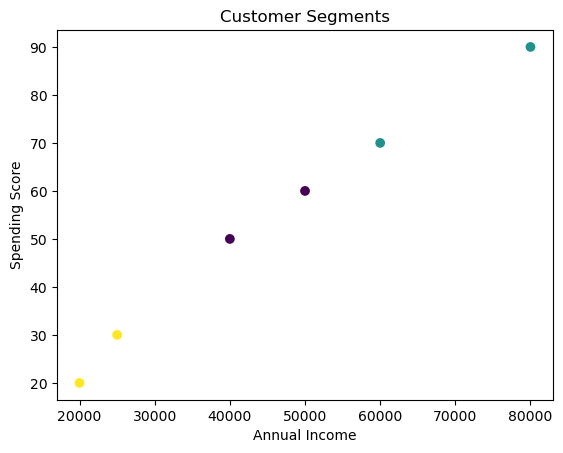

In [15]:
# viridis -> based on feature color should be changed
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

In [57]:
# Example: Hospital Patient Segmentation
# Business Context
# A hospital wants to improve patient care and resource allocation. Instead of treating all
# patients the same, they want to group them into segments based on health and lifestyle data.
#  This helps with:
# - Designing personalized treatment plans
# - Predicting high‑risk patients
# - Managing hospital resources more efficiently

# Dataset (simplified)
# Features we might use:
# - Age
# - BMI (Body Mass Index)
# - Number of yearly hospital visits
# - Chronic conditions count
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [58]:
data = {
    'PatientID': [101,102,103,104,105,106],
    'Age': [25,60,45,30,70,50],
    'BMI': [22,30,28,24,35,27],
    'HospitalVisits': [1,5,3,2,7,4],
    'ChronicConditions': [0,2,1,0,3,1]
}

In [59]:
# X = df[['Age', 'BMI', 'HospitalVisits', 'ChronicConditions']]
df = pd.DataFrame(data)
X = df[['Age', 'BMI', 'HospitalVisits', 'ChronicConditions']]
print(X)

   Age  BMI  HospitalVisits  ChronicConditions
0   25   22               1                  0
1   60   30               5                  2
2   45   28               3                  1
3   30   24               2                  0
4   70   35               7                  3
5   50   27               4                  1


In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [62]:
print(df)

   PatientID  Age  BMI  HospitalVisits  ChronicConditions  Cluster
0        101   25   22               1                  0        2
1        102   60   30               5                  2        3
2        103   45   28               3                  1        0
3        104   30   24               2                  0        2
4        105   70   35               7                  3        1
5        106   50   27               4                  1        0


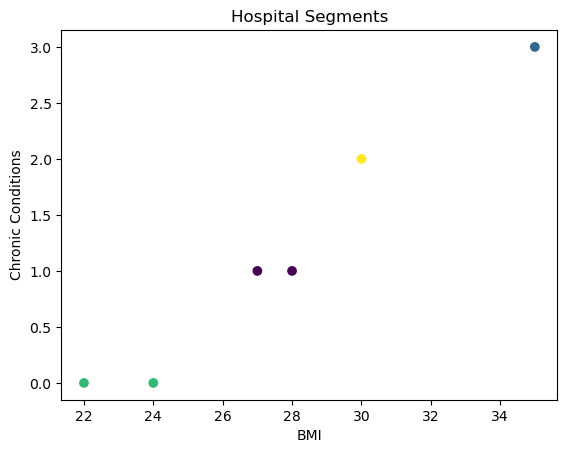

In [63]:
plt.scatter(df['BMI'], df['ChronicConditions'], c=df['Cluster'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Chronic Conditions')
plt.title('Hospital Segments')
plt.show()

In [64]:
# elbow method is a simple visual technique used in clustering to help find the best number of groups (clusters)
# to divide your data into.
# silhouette_score

In [65]:
# A telecommunications company has collected data on 500 customers, including their monthly bill amount, average call duration, internet usage, and number of support calls. The company wants to group customers into meaningful segments to design targeted marketing campaigns and improve customer service.
# You are tasked with:
# - Using K‑Means clustering to explore possible customer segments.
# - Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
# - Using the Silhouette Score to validate which number of clusters produces the most well‑separated and meaningful groups
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [66]:
data = {
    'CustomerID': range(1, 501),
    'MonthlyBill': np.random.randint(20, 200, 500),       # monthly bill in $
    'CallDuration': np.random.randint(50, 500, 500),      # avg monthly call minutes
    'InternetUsage': np.random.randint(10, 300, 500),     # GB per month
    'SupportCalls': np.random.randint(0, 10, 500)         # number of support calls
}
df = pd.DataFrame(data)

In [67]:
X = df[['MonthlyBill', 'CallDuration', 'InternetUsage', 'SupportCalls']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [68]:
# Inertia = total distance of points from their cluster centers
inertia = []
K_range = range(2,10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

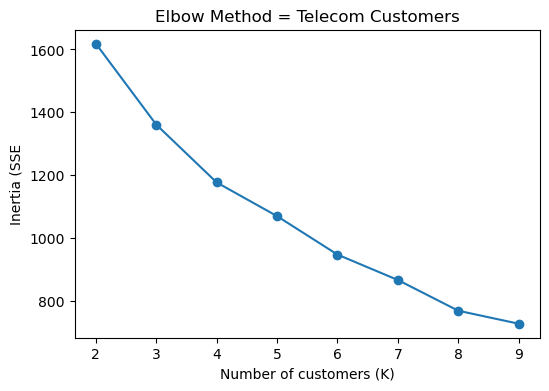

In [69]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of customers (K)')
plt.ylabel('Inertia (SSE')
plt.title('Elbow Method = Telecom Customers')
plt.show()

In [70]:
# silhouette_scores = []   # list to store scores
# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(X_scaled)
#     score = silhouette_score(X_scaled, labels)  # function
#     silhouette_scores.append(score)
# print(silhouette_scores)
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    silhouette_scores.append(score)

# print(silhouette_scores)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

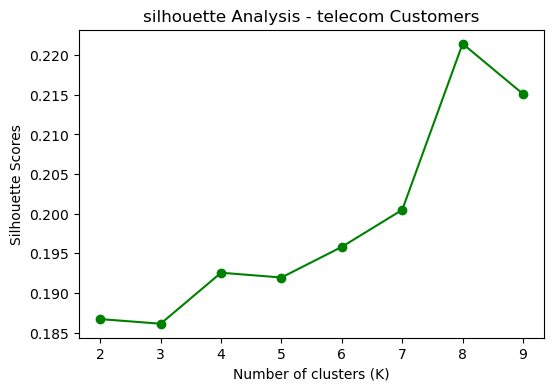

In [71]:
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Scores')
plt.title('silhouette Analysis - telecom Customers')
plt.show()

In [72]:
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best K based on silhouette score: {best_k}")

Best K based on silhouette score: 8


In [73]:
# Scenario: Movie Streaming Platform
# A movie streaming company has collected data on 1,000 users, including:
# - Average watch time per week
# - Preferred genres (action, comedy, drama, etc.)
# - Number of devices used (TV, phone, tablet)
# - Frequency of subscription pauses or cancellations
# The company wants to group users into meaningful segments to:
# - Recommend personalized movie lists
# - Design loyalty rewards for binge‑watchers
# - Identify users at risk of canceling subscriptions
# Your Tasks
# - Apply K‑Means clustering to explore possible user segments.
# - Example clusters: “Weekend binge‑watchers,” “Casual family viewers,” “Genre loyalists.”
# - Use the Elbow Method to find the point where adding more clusters doesn’t improve grouping much.
# - This helps decide whether 3, 4, or 5 clusters make sense.
# - Validate with Silhouette Score to check if the chosen clusters are well‑separated and meaningful.
# - Ensures that “binge‑watchers” aren’t mixed up with “casual viewers.”
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [74]:
np.random.seed(42)
n_users = 1000
data = {
    "WatchTimePerWeek": np.random.randint(1, 40, n_users),   # hours per week
    "PreferredGenre": np.random.randint(0, 5, n_users),      # 0=Action,1=Comedy,2=Drama,3=Romance,4=SciFi
    "DevicesUsed": np.random.randint(1, 4, n_users),         # 1–3 devices
    "PauseFrequency": np.random.randint(0, 10, n_users)      # times per year
}

df = pd.DataFrame(data)
df.head()

,WatchTimePerWeek,PreferredGenre,DevicesUsed,PauseFrequency
0,39,1,3,0
1,29,2,1,7
2,15,0,2,3
3,8,2,2,0
4,21,2,3,9


In [75]:
X = df[["WatchTimePerWeek", "PreferredGenre", "DevicesUsed", "PauseFrequency"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

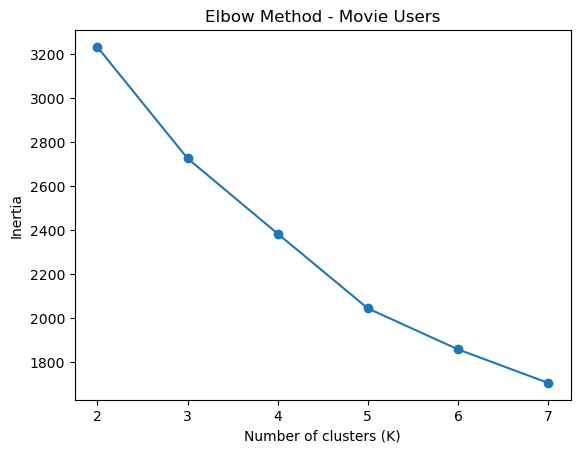

In [76]:
inertia = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Movie Users")
plt.show()

In [77]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

silhouette_scores

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

[0.18597478588639568,
 0.1872700377466418,
 0.19243923540806718,
 0.2136497440200086,
 0.20563888723900886,
 0.21700511776388845]

In [78]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.head()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,WatchTimePerWeek,PreferredGenre,DevicesUsed,PauseFrequency,Cluster
0,39,1,3,0,3
1,29,2,1,7,0
2,15,0,2,3,2
3,8,2,2,0,2
4,21,2,3,9,1


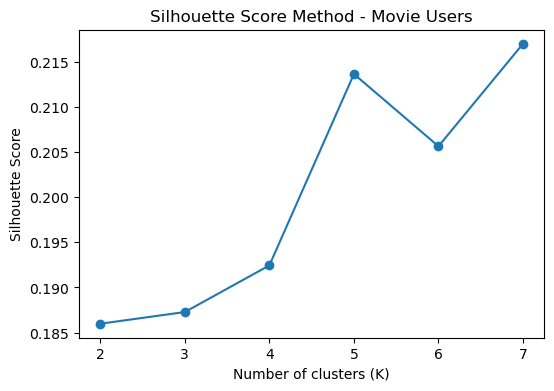

In [80]:
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method - Movie Users")
plt.show()

In [81]:
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best K based on silhouette score: {best_k}")

Best K based on silhouette score: 7


In [ ]:
# Linkage -> min, max, average, ward

In [84]:
# Hierarchircal Clustering

# Scenario Question 💼
# A retail bank wants to understand its customers better. They have
# collected data on Age and Annual Income for a sample of customers.
#  The goal is to group customers into meaningful segments so the bank can
#  design targeted loan offers, personalized investment plans, and marketing campaigns.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import numpy as np

In [85]:
data = np.array([
    [25, 15000],
    [28, 16000],
    [30, 18000],
    [35, 22000],
    [40, 25000],
    [45, 60000],
    [50, 65000],
    [55, 70000]
])

In [86]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [87]:
hierarchial_cluster = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)
cluster_labels = hierarchial_cluster.fit_predict(data_scaled)
print("Cluster Labels:", cluster_labels)

Cluster Labels: [2 2 2 1 1 0 0 0]


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [30.0, 30.0, 45.0, 45.0],
  [10.0, 10.0, 37.5, 37.5],
  [55.0, 55.0, 65.0, 65.0],
  [60.0, 60.0, 75.0, 75.0],
  [23.75, 23.75, 67.5, 67.5]],
 'dcoord': [[0.0,
   np.float64(0.5097955816206853),
   np.float64(0.5097955816206853),
   0.0],
  [0.0, np.float64(0.21595046206898014), np.float64(0.21595046206898014), 0.0],
  [np.float64(0.21595046206898014),
   np.float64(0.46598621203974555),
   np.float64(0.46598621203974555),
   0.0],
  [np.float64(0.5097955816206853),
   np.float64(1.5782509349563538),
   np.float64(1.5782509349563538),
   np.float64(0.46598621203974555)],
  [0.0, np.float64(0.5398761551724502), np.float64(0.5398761551724502), 0.0],
  [np.float64(0.5398761551724502),
   np.float64(0.935092930553623),
   np.float64(0.935092930553623),
   0.0],
  [np.float64(1.5782509349563538),
   np.float64(5.2744278976676995),
   np.float64(5.2744278976676995),
   np.float64(0.935092930553623)]],
 'ivl': [5, 4, 3, 2, 1, 7,

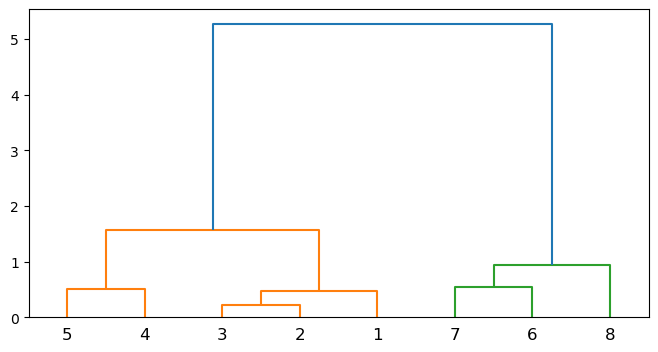

In [89]:
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(8,4))
dendrogram(linked, 
           orientation='top',
           labels=range(1, len(data_scaled)+1),
           distance_sort = 'descending',
           show_leaf_counts=True)

Cluster Labels: [1 1 1 0 0 0 0 0 2 2]

Employee Data with Clusters:
    Age  AnnualSalary  Cluster
0   22         30000        1
1   25         35000        1
2   28         40000        1
3   32         60000        0
4   35         65000        0
5   38         70000        0
6   42         90000        0
7   45         95000        0
8   50        120000        2
9   55        130000        2


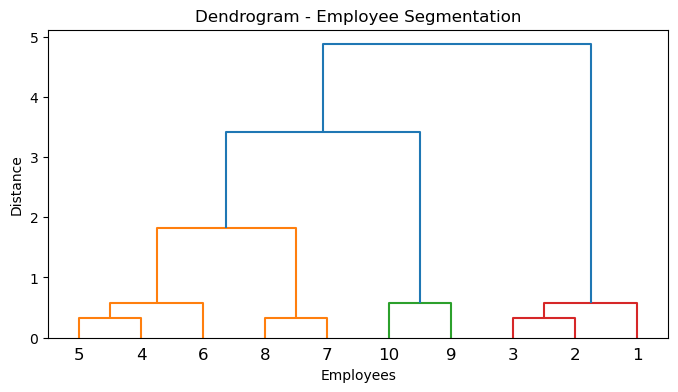

In [93]:
# Scenario: Employee Segmentation in a Tech Company
# Business Problem
# A tech company wants to understand its employees better to design training programs
# and salary structures. They collected data on each employee’s Age and Annual Salary.
# Management believes employees can be grouped into clusters such as:
# - Young, entry‑level employees
# - Mid‑career professionals
# - Senior, high‑earning employees
# They decide to use hierarchical clustering to explore these segments.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

data = np.array([
    [25, 15000],
    [28, 16000],
    [30, 18000],
    [35, 22000],
    [40, 25000],
    [45, 60000],
    [50, 65000],
    [55, 70000]
])

X = df[["Age", "AnnualSalary"]]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

hierarchial_cluster = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

cluster_labels = hierarchial_cluster.fit_predict(data_scaled)
print("Cluster Labels:", cluster_labels)

df["Cluster"] = cluster_labels
print("\nEmployee Data with Clusters:\n", df)

linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(8,4))
dendrogram(
    linked,
    orientation='top',
    labels=range(1, len(data_scaled)+1),
    distance_sort='descending',
    show_leaf_counts=True
)

plt.title("Dendrogram - Employee Segmentation")
plt.xlabel("Employees")
plt.ylabel("Distance")
plt.show()